This is a trial notebook which is introducing the eurostat python package, source: https://pypi.org/project/eurostat/.
At first we import packages as always. Then we explore functions get_toc and get_toc_df.

In [1]:
import eurostat
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
import os
import arcpy
import zipfile

In [2]:
toc = eurostat.get_toc()
toc_df = eurostat.get_toc_df()

"Toc" stands for "table of contents" and the function get_toc reads the table of contents of the Eurostat and returns it as a list of tuples. So basically it loads names and simple metadata of all of the available datasets at Eurostat. The first tuple contains the header line (names of the columns).

In [26]:
print(f"columns: {toc[0]}")
print(f"dataset number 10: {toc[11]}")
print(f"number of Eurostat datasets: {len(toc)}")

columns: ('title', 'code', 'type', 'last update of data', 'last table structure change', 'data start', 'data end')
dataset number 10: ('Passengers (excluding cruise passengers) transported from/to the main ports - United Kingdom - quarterly data', 'MAR_PA_QM_UK', 'dataset', '2010-02-26T23:00:00+0100', '2023-07-28T23:00:00+0200', '1997-Q1', '2020-Q2')
number of Eurostat datasets: 7521


Function get_toc_df does the same as function get_toc, but instead of returning the table of contents as a list of tuples, get_tocs_df returns it as pandas dataframe. It is a 2-dimensional data structure with labeled rows and columns for storing tabular data. For accessing an element in the dataframe there is a loc attribute which can be specified to access chosen row.

In [31]:
print(type(toc_df))
print(len(toc_df))
print(toc_df.loc[10])

<class 'pandas.core.frame.DataFrame'>
7520
title                          Passengers (excluding cruise passengers) trans...
code                                                                MAR_PA_QM_UK
type                                                                     dataset
last update of data                                     2010-02-26T23:00:00+0100
last table structure change                             2023-07-28T23:00:00+0200
data start                                                               1997-Q1
data end                                                                 2020-Q2
Name: 10, dtype: object


By using subset_toc_df you can return a subset of the datasets by typing some keyword and if title of the dataset contains that keyword, it is added to the subset dataframe.

In [19]:
f = eurostat.subset_toc_df(toc_df, 'unemployment rate by sex')
f

,title,code,type,last update of data,last table structure change,data start,data end
937,"Unemployment rate by sex, age, migration statu...",LFSO_14LUNER,dataset,2019-03-28T23:00:00+0100,2021-02-08T23:00:00+0100,2014,2014
966,"Unemployment rate by sex, age, educational att...",LFSO_16UNERT,dataset,2022-02-03T23:00:00+0100,2021-02-08T23:00:00+0100,2016,2016
2911,"Youth unemployment rate by sex, age and countr...",YTH_EMPL_100,dataset,2023-04-27T11:00:00+0200,2023-04-27T11:00:00+0200,1995,2022
2913,"Youth unemployment rate by sex, age and NUTS 2...",YTH_EMPL_110,dataset,2023-04-27T11:00:00+0200,2023-04-27T11:00:00+0200,1999,2022
2977,Unemployment rate by sex,TEILM020,dataset,2023-11-06T23:00:00+0100,2023-11-06T23:00:00+0100,2022-11,2023-10
2979,Unemployment rate by sex - age group 15-24,TEILM021,dataset,2023-11-06T23:00:00+0100,2023-11-06T23:00:00+0100,2022-11,2023-10
2981,Unemployment rate by sex - age group 25-74,TEILM022,dataset,2023-11-06T23:00:00+0100,2023-11-06T23:00:00+0100,2022-11,2023-10
3239,Unemployment rate by sex,TESEM120,dataset,2023-06-20T23:00:00+0200,2023-06-20T23:00:00+0200,2005,2022
3241,Long-term unemployment rate by sex,TESEM130,dataset,2023-09-14T23:00:00+0200,2023-09-14T23:00:00+0200,2005,2022
3243,Youth unemployment rate by sex,TESEM140,dataset,2023-06-20T23:00:00+0200,2023-06-20T23:00:00+0200,2005,2022


Function get_pars takes the dataset code and returns the header of the dataset (names of the columns/attributes).

In [13]:
pars = eurostat.get_pars('teilm020')
pars

['freq', 's_adj', 'age', 'sex', 'unit', 'geo']

Get_par_values returns all the values which are in the specified column.

In [14]:
par_values = eurostat.get_par_values('teilm020', 'sex')
par_values

['T', 'M', 'F']

Definition of this function looks like this: eurostat.get_dic(code, par, [full=True], [frmt="list"], [lang="en"]). 

In [15]:
dic = eurostat.get_dic('teilm020', 'sex', full = False)
dic

[('T', 'Total'), ('M', 'Males'), ('F', 'Females')]

eurostat.get_data(code, [flags=False], [filter_pars=dict()], [verbose=False], [reverse_time=False])

Read an Eurostat dataset and returns it as a list of tuples. The first element of the list ("the first row") is the data header.

To get a subset, set filter_pars (a dictionary where keys are parameter names, values are the wanted items).

To see a rough progress status, set verbose=True.

flag=True downloads also the flags associated to the data. Pay attention: the data format changes if flags is True or not. Flag meanings can be found here.

reverse_time=True reverses the order of the time columns. For compatibility with 0.x.x versions.

In [2]:
# data = eurostat.get_data('GOV_10DD_SLGD')
data = eurostat.get_data('NAMA_10_A64_E')

In [3]:
print(data[0])
data[90:95]

('freq', 'unit', 'nace_r2', 'na_item', 'geo\\TIME_PERIOD', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022')


[('A',
  'PCH_PRE_HW',
  'A',
  'SELF_DC',
  'EA20',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  -1.1,
  -1.9,
  -2.3,
  -3.1,
  -2.6,
  -2.9,
  -2.8,
  -2.5,
  -3.5,
  -1.8,
  -3.5,
  -3.3,
  -4.3,
  -1.8,
  -3.9,
  -2.7,
  -2.5,
  -1.7,
  -2.7,
  -3.7,
  -1.5,
  -1.7,
  -1.2,
  -4.2,
  -3.0,
  0.0,
  -1.7),
 ('A',
  'PCH_PRE_HW',
  'A',
  'SELF_DC',
  'EE',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  -2.5,
  -2.2,
  -8.9,
  -9.6,
  -10.6,
  -4.3,
  -3.8,
  -2.2,
  -11.6,
  -13.0,
  -11.8,
  -7.8,
  -12.8,
  -17.8,
  0.1,
  7.5,
  -1.0,
  -14.0,
  -7.2,
  3.6,
  2.3,
  -0.4,
  -5.0,
  4.3,
  -7.0,
  -8.8,
  -10.8),
 ('A',
  'PCH_PRE_HW',
  'A',
  'SELF_DC',
  'EL',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
 

In [5]:
# data = eurostat.get_data_df('teilm020')
data = eurostat.get_data_df('NAMA_10_A64_E')
data

,freq,unit,nace_r2,na_item,geo\TIME_PERIOD,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,PCH_PRE_HW,A,EMP_DC,AT,NaN,NaN,NaN,NaN,NaN,...,-4.1,0.3,-4.6,-0.6,-1.7,-3.1,-3.3,6.0,0.4,-2.3
1,A,PCH_PRE_HW,A,EMP_DC,BE,NaN,NaN,NaN,NaN,NaN,...,0.8,2.8,1.0,3.7,0.4,1.0,1.2,1.6,-1.1,-2.0
2,A,PCH_PRE_HW,A,EMP_DC,BG,NaN,NaN,NaN,NaN,NaN,...,1.2,1.5,-2.8,-3.7,6.2,-6.4,-4.5,-1.6,-5.6,-8.2
3,A,PCH_PRE_HW,A,EMP_DC,CH,NaN,NaN,NaN,NaN,NaN,...,0.4,0.8,-2.3,-0.7,-4.0,-3.2,-10.8,2.0,-6.2,-3.6
4,A,PCH_PRE_HW,A,EMP_DC,CY,NaN,NaN,NaN,NaN,NaN,...,-0.1,-1.3,-1.2,2.4,-1.9,-5.7,0.9,-0.9,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42767,A,THS_PER,U,SELF_DC,SE,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
42768,A,THS_PER,U,SELF_DC,SI,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42769,A,THS_PER,U,SELF_DC,SK,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42770,A,THS_PER,U,SELF_DC,UK,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
""" pars = eurostat.get_pars('teilm020')
dic = []
for i in pars:
    dic.append(eurostat.get_dic('teilm020', i, full = False, frmt = "dict"))
dic """

pars = eurostat.get_pars('NAMA_10_A64_E')
dic = []
for i in pars:
    dic.append(eurostat.get_dic('NAMA_10_A64_E', i, full = False, frmt = "dict"))
dic

[{'A': 'Annual'},
 {'THS_HW': 'Thousand hours worked',
  'THS_PER': 'Thousand persons',
  'THS_JOB': 'Thousand jobs',
  'PCH_PRE_PER': 'Percentage change on previous period (based on persons)',
  'PCH_PRE_HW': 'Percentage change on previous period (based on hours worked)',
  'PCH_PRE_JOB': 'Percentage change on previous period (based on jobs)'},
 {'TOTAL': 'Total - all NACE activities',
  'A': 'Agriculture, forestry and fishing',
  'A01': 'Crop and animal production, hunting and related service activities',
  'A02': 'Forestry and logging',
  'A03': 'Fishing and aquaculture',
  'B-E': 'Industry (except construction)',
  'B': 'Mining and quarrying',
  'C': 'Manufacturing',
  'C10-C12': 'Manufacture of food products; beverages and tobacco products',
  'C13-C15': 'Manufacture of textiles, wearing apparel, leather and related products',
  'C16-C18': 'Manufacture of wood, paper, printing and reproduction',
  'C16': 'Manufacture of wood and of products of wood and cork, except furniture; manu

In [25]:
print(pars)
print(dic[0])
print(dic[1:4])
print(type(dic))
print(type(pars))
print(data["sex"])

['freq', 's_adj', 'age', 'sex', 'unit', 'geo']
{'M': 'Monthly'}
[{'SA': 'Seasonally adjusted data, not calendar adjusted data'}, {'TOTAL': 'Total'}, {'T': 'Total', 'M': 'Males', 'F': 'Females'}]
<class 'list'>
<class 'list'>
0      F
1      F
2      F
3      F
4      F
      ..
100    T
101    T
102    T
103    T
104    T
Name: sex, Length: 105, dtype: object


change column name 'geo/time' to 'geo'
Replacement of keys for values. Now instead of keys which are abbreviations there will be values, so everyone can understand what is the dataset about. Our dataframe is transposed in the end, which means that rows become columns and vice-versa.

In [26]:
data.rename(columns = {'geo\TIME_PERIOD':'geo', '2023-09':'unem_09_23'}, inplace = True)
i = 0
for d in pars:
    data[d] = data[d].replace(dic[i])
    i += 1
data = data.set_index(pars).transpose()
data

freq                                                    Monthly          \
s_adj      Seasonally adjusted data, not calendar adjusted data           
age                                                       Total           
sex                                                     Females           
unit               Percentage of population in the labour force           
geo                                                     Austria Belgium   
2022-11                                                   4.9       5.5   
2022-12                                                   4.4       5.4   
2023-01                                                   5.1       5.1   
2023-02                                                   4.9       4.9   
2023-03                                                   4.0       4.8   
2023-04                                                   5.0       4.8   
2023-05                                                   4.6       4.9   
2023-06                                                   5.0       4.9   
2023-07                                                   5.2       4.9   
2023-08                                                   4.9       4.8   
unem_09_23                                                5.0       4.9   
2023-10                                                   NaN       NaN   

freq                                                            \
s_adj                                                            
age                                                              
sex                                                              
unit                                                             
geo        Bulgaria Switzerland Cyprus Czechia Germany Denmark   
2022-11         3.8         4.6    8.4     3.2     2.9     4.2   
2022-12         3.9         4.5    8.2     2.5     2.9     4.5   
2023-01         3.8         4.4    7.7     3.0     2.8     4.4   
2023-02         3.9         4.3    7.2     2.9     2.8     5.1   
2023-03         4.1         4.3    6.6     3.1     2.7     4.7   
2023-04         4.3         4.2    6.2     3.4     2.7     4.9   
2023-05         4.4         4.1    6.1     2.9     2.7     4.6   
2023-06         4.6         4.0    6.3     3.1     2.7     5.0   
2023-07         4.6         NaN    6.9     3.5     2.7     5.5   
2023-08         4.6         NaN    7.0     3.0     2.7     4.9   
unem_09_23      4.6         NaN    6.5     3.0     2.7     4.6   
2023-10         NaN         NaN    NaN     NaN     NaN     NaN   

freq                                                     ...  \
s_adj                                                    ...   
age                                                      ...   
sex                                                      ...   
unit                                                     ...   
geo        Euro area – 20 countries (from 2023) Estonia  ...   
2022-11                                     7.1     4.7  ...   
2022-12                                     7.1     4.6  ...   
2023-01                                     7.1     5.1  ...   
2023-02                                     7.0     5.0  ...   
2023-03                                     6.9     5.6  ...   
2023-04                                     6.9     6.2  ...   
2023-05                                     6.9     7.2  ...   
2023-06                                     6.8     7.4  ...   
2023-07                                     6.8     7.8  ...   
2023-08                                     6.8     7.7  ...   
unem_09_23                                  6.8     7.7  ...   
2023-10                                     NaN     NaN  ...   

freq                                                                   \
s_adj                                                                   
age                                                                     
sex                                               Total                 
unit       Perc

Selecting unemployment data for all sexes combined, so only rows with value 'Total' in column 'sex' are used.

In [27]:
print(data.columns.names)
print(data.columns.get_level_values(3).unique())
data.loc[:, ('Monthly',
            'Seasonally adjusted data, not calendar adjusted data',
            'Total',
            'Total',
            'Percentage of population in the labour force')]

['freq', 's_adj', 'age', 'sex', 'unit', 'geo']
Index(['Females', 'Males', 'Total'], dtype='object', name='sex')


geo,Austria,Belgium,Bulgaria,Switzerland,Cyprus,Czechia,Germany,Denmark,Euro area – 20 countries (from 2023),Estonia,...,Netherlands,Norway,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia,Türkiye,United States
2022-11,5.5,5.7,4.0,4.4,7.3,2.7,3.0,4.8,6.7,5.4,...,3.6,3.1,2.9,6.4,5.7,7.1,3.6,6.0,10.1,3.6
2022-12,4.9,5.7,4.1,4.3,7.1,2.3,3.0,4.9,6.7,5.3,...,3.5,3.4,2.8,6.7,5.6,7.5,3.5,6.0,10.2,3.5
2023-01,5.1,5.7,4.0,4.1,6.7,2.5,3.0,4.3,6.7,5.2,...,3.6,3.6,2.7,7.0,5.6,7.3,3.5,6.0,9.7,3.4
2023-02,4.9,5.6,4.1,4.1,6.5,2.4,3.0,5.5,6.6,5.3,...,3.5,3.8,2.7,6.8,5.5,7.6,3.6,6.0,10.1,3.6
2023-03,4.5,5.6,4.2,4.0,6.3,2.6,2.9,4.5,6.5,5.9,...,3.5,3.8,2.7,6.8,5.5,7.3,3.7,6.0,10.0,3.5
2023-04,5.1,5.6,4.3,4.0,6.2,2.7,2.9,4.8,6.5,6.2,...,3.4,3.6,2.8,6.5,5.5,7.2,3.8,5.9,10.0,3.4
2023-05,4.7,5.6,4.4,3.9,6.1,2.5,3.0,4.8,6.5,6.7,...,3.5,3.1,2.8,6.4,5.5,7.2,3.8,5.9,9.5,3.7
2023-06,5.1,5.6,4.5,3.9,6.2,2.8,3.0,4.8,6.4,7.1,...,3.5,3.4,2.8,6.4,5.6,8.0,3.7,5.8,9.6,3.6
2023-07,5.7,5.5,4.5,NaN,6.6,2.7,3.0,5.6,6.5,7.5,...,3.6,3.6,2.8,6.4,5.5,7.1,3.6,5.8,9.4,3.5
2023-08,5.3,5.5,4.5,NaN,6.6,2.5,3.0,4.4,6.4,7.3,...,3.6,3.6,2.8,6.4,5.4,8.1,3.5,5.8,9.2,3.8


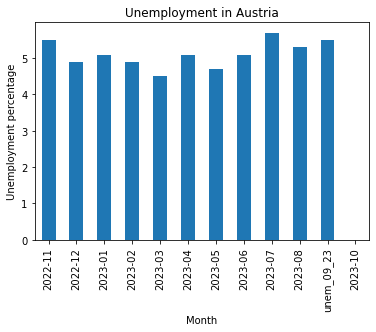

In [28]:
d = data.loc[:, ('Monthly',
                'Seasonally adjusted data, not calendar adjusted data',
                'Total',
                'Total',
                'Percentage of population in the labour force')]
ax = d['Austria'].plot.bar()
ax.set_title('Unemployment in Austria') 
ax.set_xlabel('Month') 
_ = ax.set_ylabel('Unemployment percentage') 

Download of NUTS shapefile using package requests.

In [50]:
# URL of the shapefile to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/shp/NUTS_RG_20M_2021_3035.shp.zip"

# Define the file name and path for saving the downloaded file
file_name = "NUTS_RG_20M_2021_3035.shp.zip"
file_path = os.path.join("D:/diplomka/data/", file_name)  # Save in the current directory

# Send a GET request to the URL to download the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content to a file
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print(f"File '{file_name}' downloaded successfully!")
else:
    print("Failed to download the file.")

File 'NUTS_RG_20M_2021_3035.shp.zip' downloaded successfully!


In [34]:
nuts= gpd.read_file('D:/diplomka/data/NUTS_RG_20M_2021_3035.shp.zip')
countries = nuts[nuts['LEVL_CODE'] == 0]
#countries

NotImplementedError: Multi-part geometries do not themselves provide the array interface

In [35]:
ax = countries.plot()
ax.set_xlim(2000000, 8000000)
_ = ax.set_ylim(1000000, 5500000)

NameError: name 'countries' is not defined

In [36]:
d = data.loc[:, ('Monthly',
                'Seasonally adjusted data, not calendar adjusted data',
                'Total',
                'Total',
                'Percentage of population in the labour force')]

d = d[d.index == 'unem_09_23'].transpose().reset_index()
inverted_dic = dict(map(reversed, dic[5].items()))
d['geo'] = d['geo'].replace(inverted_dic)

""" d_gpd = countries.merge(d, right_on='geo', left_on='NUTS_ID')
print(type(d_gpd))
d_gpd """

print(type(d))
d

<class 'pandas.core.frame.DataFrame'>


,geo,unem_09_23
0,AT,5.5
1,BE,5.6
2,BG,4.5
3,CH,NaN
4,CY,6.2
5,CZ,2.7
6,DE,3.0
7,DK,4.8
8,EA20,6.5
9,EE,7.4


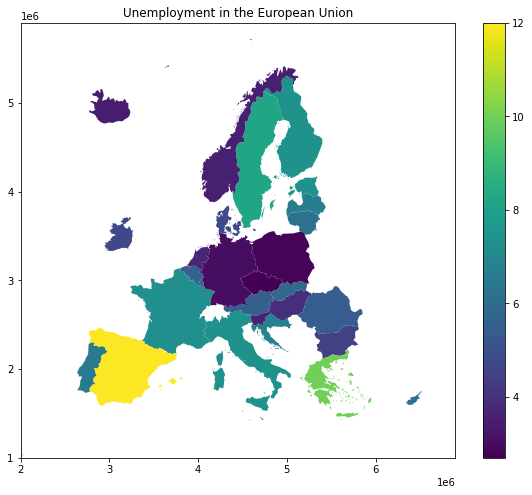

In [151]:
ax = d_gpd.plot(column='unem_09_23', legend=True, figsize=[10,8]) 
ax.set_xlim(2000000, 6900000) 
ax.set_ylim(1000000, 5900000) 
_ = ax.set_title('Unemployment in the European Union')

In [5]:
with zipfile.ZipFile('D:/diplomka/data/NUTS_RG_20M_2021_3035.shp.zip', 'r') as zip_ref:
    zip_ref.extractall()

arcpy.conversion.FeatureClassToGeodatabase('D:/diplomka/diplomka/NUTS_RG_20M_2021_3035.shp', 'D:/diplomka/diplomka/Default.gdb')
print("NUTS in shapefile unzipped and imported to File geodatabase")

NUTS in shapefile unzipped and imported to File geodatabase


Save the name of the current map into variable mapName, create ArcGISProject object and map object.

In [34]:
mapName = "Map"
project = arcpy.mp.ArcGISProject("CURRENT")
m = project.listMaps(mapName)[0]

Specify the path to the nuts in geodatabase and add it to the current map.

In [31]:
nuts = "D:/diplomka/diplomka/Default.gdb/NUTS0_20M"
m.addDataFromPath(nuts)

Converting pandas dataframe with unemployment rate in EU in September 2023 to csv file in order to join the data into NUTS0 feature class.

In [40]:
d.to_csv("D:/diplomka/data/unemployment_09_2023.csv")
arcpy.management.JoinField("D:/diplomka/diplomka/Default.gdb/NUTS0_20M", "NUTS_ID", "D:/diplomka/data/unemployment_09_2023.csv", "geo", "unem_09_23", "NOT_USE_FM", None)

<Result 'D:/diplomka/diplomka/Default.gdb/NUTS0_20M'>

In [39]:
lyr = m.listLayers()[0]
sym = lyr.symbology
color = project.listColorRamps("Oranges (Continuous)")[0]

if hasattr(sym, 'renderer'):
    sym.updateRenderer('GraduatedColorsRenderer')
    sym.renderer.breakCount = 5
    sym.renderer.classificationField = "unem_09_23"
    sym.renderer.colorRamp = color
    lyr.symbology = sym

The “Hello World” equivalent in the ArcGIS API for Python is the following:

In [1]:
from arcgis.gis import GIS
mygis = GIS()
mygis.map()

MapView(layout=Layout(height='400px', width='100%'))